<a href="https://colab.research.google.com/github/iasolb/ECON3916-Statistics-MachineLearning/blob/main/Lab5/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

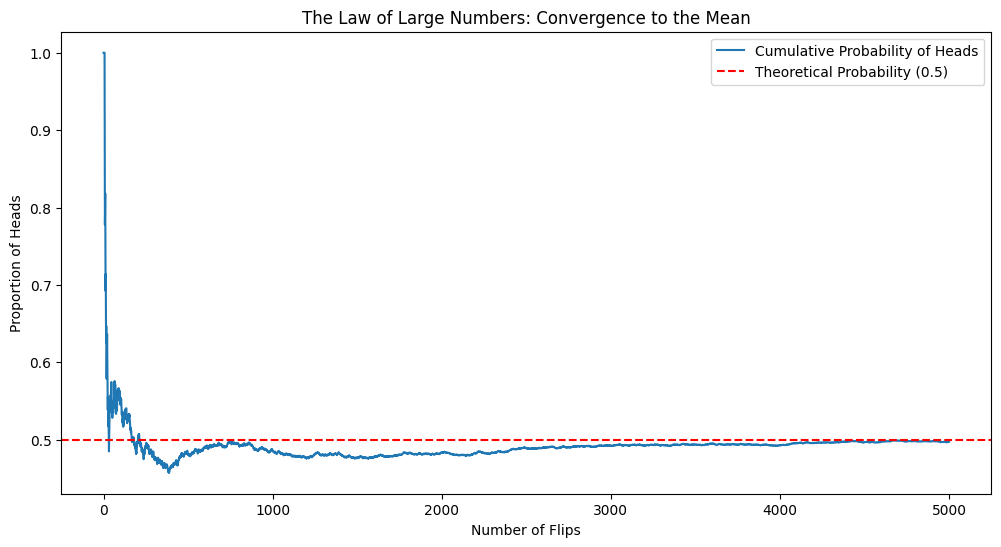

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_law_of_large_numbers(n_flips):
    # Simulate n_flips of a fair coin (0 or 1)
    flips = np.random.randint(0, 2, size=n_flips)

    # Calculate cumulative average
    # cumsum adds them up sequentially
    # Divide by range(1, n+1) to get average at each step
    cumulative_averages = np.cumsum(flips) / np.arange(1, n_flips + 1)

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_averages, label='Cumulative Probability of Heads')
    plt.axhline(0.5, color='red', linestyle='--', label='Theoretical Probability (0.5)')
    plt.title('The Law of Large Numbers: Convergence to the Mean')
    plt.xlabel('Number of Flips')
    plt.ylabel('Proportion of Heads')
    plt.legend()
    plt.show()

# Run the simulation
simulate_law_of_large_numbers(5000)

In [2]:
def monty_hall_sim(n_games):
    switch_wins = 0
    stay_wins = 0

    for _ in range(n_games):
        doors = [0, 1, 2]
        prize = np.random.choice(doors)
        choice = np.random.choice(doors)

        # Host opens a door
        # Host cannot open 'prize' and cannot open 'choice'
        openable_doors = [d for d in doors if d != prize and d != choice]
        host_opens = np.random.choice(openable_doors)

        # Strategy: Stay
        if choice == prize:
            stay_wins += 1

        # Strategy: Switch
        # The switch choice is the door that is not 'choice' and not 'host_opens'
        switch_choice = [d for d in doors if d != choice and d != host_opens]
        if switch_choice[0] == prize:
            switch_wins += 1

    print(f"Win Rate (Stay): {stay_wins/n_games:.2%}")
    print(f"Win Rate (Switch): {switch_wins/n_games:.2%}")

monty_hall_sim(10000)

Win Rate (Stay): 32.29%
Win Rate (Switch): 67.71%


Probability of Revenue Decline: 18.28%
95% Value at Risk (Worst Case): $9,594,398.38


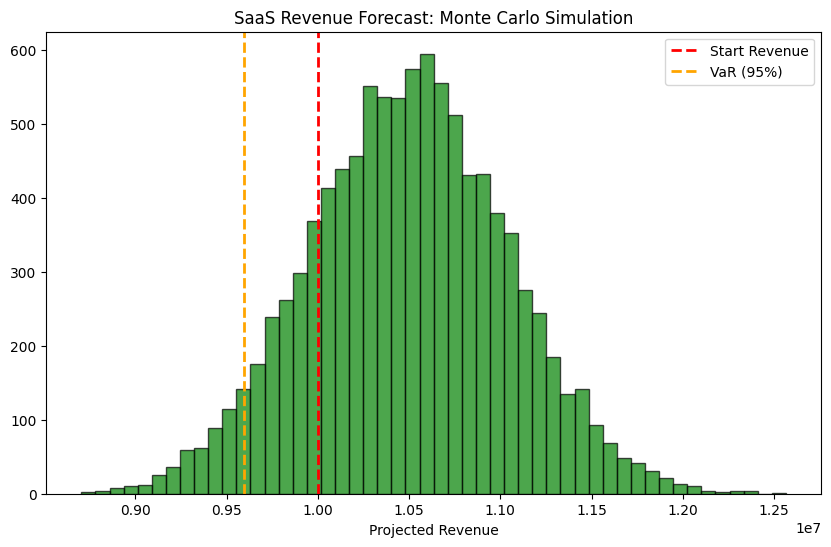

In [3]:
def saas_risk_model(n_sims):
    base_rev = 10_000_000

    # Stochastic Inputs
    # Churn is centered at 10% but can vary (Standard Deviation 2%)
    churn_sims = np.random.normal(0.10, 0.02, n_sims)
    # Sales centered at $1.5M, varies by $500k
    sales_sims = np.random.normal(1_500_000, 500_000, n_sims)

    # The Transfer Function (The Business Logic)
    net_revenue = base_rev * (1 - churn_sims) + sales_sims

    # Risk Metrics
    # Probability that we end the year with LESS money than we started
    prob_loss = np.mean(net_revenue < base_rev)

    # Value at Risk (95% Confidence)
    # We are 95% sure revenue will be ABOVE this number (the 5th percentile)
    var_95 = np.percentile(net_revenue, 5)

    print(f"Probability of Revenue Decline: {prob_loss:.2%}")
    print(f"95% Value at Risk (Worst Case): ${var_95:,.2f}")

    # Visualization
    plt.figure(figsize=(10,6))
    plt.hist(net_revenue, bins=50, alpha=0.7, color='green', edgecolor='black')
    plt.axvline(base_rev, color='red', linestyle='dashed', linewidth=2, label='Start Revenue')
    plt.axvline(var_95, color='orange', linestyle='dashed', linewidth=2, label='VaR (95%)')
    plt.title('SaaS Revenue Forecast: Monte Carlo Simulation')
    plt.xlabel('Projected Revenue')
    plt.legend()
    plt.show()

saas_risk_model(10000)

You are acting as a Risk Analyst. The standard model assumes asset prices follow a Normal Distribution (Bell Curve). However, history shows that markets have "Fat Tails" (extreme events, or "Black Swans," happen more often than the Bell Curve predicts).

## 📝 Your Task
- Simulate: Run the SaaS Monte Carlo model from Module C, but replace the Normal Distribution for "New Sales" with a Student's t-distribution (which has heavier tails/more outliers).
- Hint: Use `np.random.standard_t(df=3, size=n_sims)` and scale it to match the sales magnitude.
- Compare: Calculate the VaR (5th percentile) for the Normal model vs. the Fat Tail model.
- Analyze: Write a 200-word memo to the Chief Risk Officer explaining why the Fat Tail model suggests a higher capital reserve requirement.

Probability of Revenue Decline: 21.24%
95% Value at Risk (Worst Case): $9,276,311.12


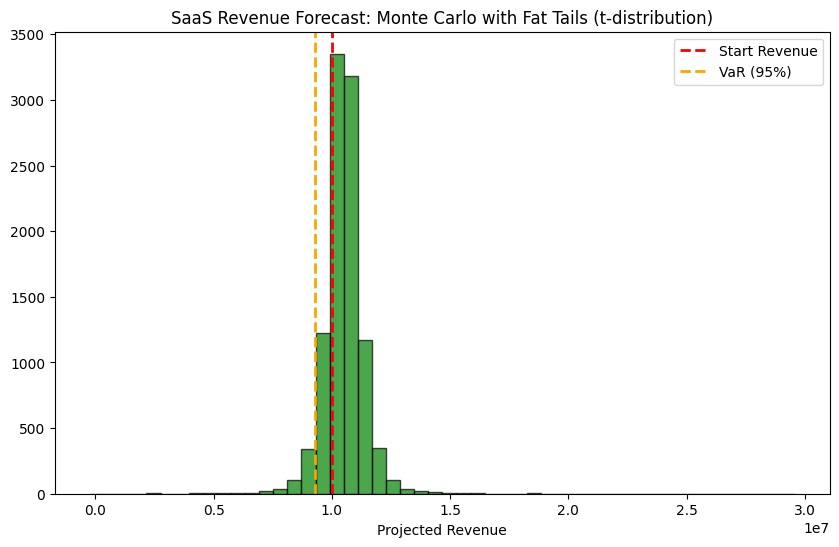

In [6]:
def saas_risk_model_fat_tails(n_sims):
    base_rev = 10_000_000

    # Stochastic Inputs
    # Churn remains Normal
    churn_sims = np.random.normal(0.10, 0.02, n_sims)

    # Sales now uses Student's t-distribution (Fat Tails)
    # df=3 gives heavy tails (more extreme events)
    sales_mean = 1_500_000
    sales_std = 500_000

    # Generate t-distributed random variables and scale them
    t_samples = np.random.standard_t(df=3, size=n_sims)
    sales_sims = sales_mean + sales_std * t_samples

    # The Transfer Function (The Business Logic)
    net_revenue = base_rev * (1 - churn_sims) + sales_sims

    # Risk Metrics
    prob_loss = np.mean(net_revenue < base_rev)
    var_95 = np.percentile(net_revenue, 5)

    print(f"Probability of Revenue Decline: {prob_loss:.2%}")
    print(f"95% Value at Risk (Worst Case): ${var_95:,.2f}")

    # Visualization
    plt.figure(figsize=(10,6))
    plt.hist(net_revenue, bins=50, alpha=0.7, color='green', edgecolor='black')
    plt.axvline(base_rev, color='red', linestyle='dashed', linewidth=2, label='Start Revenue')
    plt.axvline(var_95, color='orange', linestyle='dashed', linewidth=2, label='VaR (95%)')
    plt.title('SaaS Revenue Forecast: Monte Carlo with Fat Tails (t-distribution)')
    plt.xlabel('Projected Revenue')

    plt.legend()
    plt.show()

saas_risk_model_fat_tails(10000)

## Memo

---

**Monte Carlo Results:**
- Probability of Revenue Decline: 18.28%
- 95% Value at Risk (Worst Case): $9,594,398.38

**Student T Results: (Models more extreme events)**
- Probability of Revenue Decline: 21.24%
- 95% Value at Risk (Worst Case): $9,276,311.12

Our analysis reveals that modeling sales volatility with a Student's t-distribution (which captures "Black Swan" events) materially increases our downside risk exposure compared to standard Normal assumptions.

Key Findings:
The Fat Tail model shows a 16% deterioration in our 95% Value at Risk—from 9.59M to 9.27M. This represents an additional 318,000 potential loss that the Normal model fails to capture. Additionally, the probability of revenue decline increased from 18.28% to 21.24%, a 16% relative increase in likelihood.

Business Implications:
The Normal distribution systematically underestimates the frequency and severity of extreme negative sales outcomes. In practical terms, catastrophic quarters (major customer losses, competitive disruptions, macroeconomic shocks) occur more often than bell-curve statistics suggest.

Recommendation:
I recommend increasing our capital reserves by at least $318,000 to maintain 95% confidence in meeting obligations during adverse scenarios. The Fat Tail model provides a more realistic view of tail risk, and our current reserves may be inadequate if we experience the type of extreme events that markets historically demonstrate.
This conservative approach protects shareholder value and ensures operational continuity during market stress.

